### Laboratorio No. 2

##### Inciso 1

En este lab trabajaremos operadores morfológicos en im´agenes binarias y escala de grises. Para referencia, revisar el capítulo 9 del
libro Digital Image Processing de González y Woods.


1. Leer la sección 9.4 sobre el operador Hit or Miss. Explicar con sus propias palabras cómo funciona este operador, y cómo se
construye la operación A ∗ B a partir de las operaciones básicas de dilatación, erosión, opening, closing y diferencia.

**Hit or Miss**
- El operador Hit or Miss es una herramienta en la morfología matemática que nos puede servir a la hora de querer identificar patrones específicos en imágenes binarias, porque busca coincidencias exactas entre una configuración definida por un elemento estructurante y las estructuras presentes en la imagen.

**¿Cómo Funciona?**
- Supongamos que tenemos una imagen binaria y queremos encontrar una forma particular en la misma. Para eso, usaríamos un elemento estructurante que representa la forma que estamos buscando. Este elemento se compone de dos partes:

1. **Parte que debe coincidir con el objeto:** Define la forma que quieres detectar.
2. **Parte que debe coincidir con el fondo:** Especifica el área que debe estar ausente alrededor de la forma.

- El operador Hit or Miss verifica simultáneamente si la primera parte encaja con el objeto y la segunda con el fondo. Si ambas condiciones se cumplen en una posición específica, se considera una coincidencia.

**Construcción de A * B usando operaciones básicas**
- Para construir la operación "A * B" a partir de operaciones morfológicas básicas, seguimos estos pasos:

**1. Erosión del objeto:** Aplicamos una erosión a la imagen A utilizando la parte del elemento estructurante que corresponde al objeto. Esto identifica las áreas donde el objeto encaja perfectamente con la forma deseada.

**2. Erosión del fondo:** Aplicamos una erosión al complemento de A (es decir, donde antes había fondo ahora hay objeto y viceversa) utilizando la parte del elemento estructurante que corresponde al fondo. Esto asegura que alrededor del objeto detectado haya fondo, según lo especificado.

**3. Intersección de resultados:** Finalmente, tomamos la intersección de los resultados de las dos erosiones anteriores. Las posiciones donde ambas condiciones se cumplen simultáneamente indican la presencia exacta del patrón buscado.

- - -

##### Inciso 1.1

Mostrar un ejemplo con una imagen binaria de su elección en donde se muestre que el operador Hit or Miss detecta la localización de uno (o varios) objetos específicos dentro de una imagen binaria I.

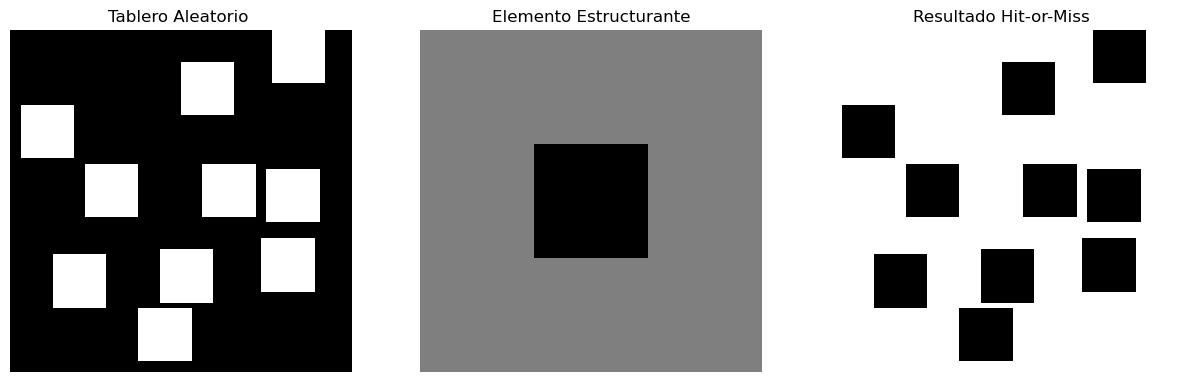

In [219]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Crear un tablero binario con cuadros blancos distribuidos aleatoriamente
def crear_tablero_aleatorio_sin_tocar(tamaño, casilla, num_cuadros, espacio):
    tablero = np.zeros((tamaño, tamaño), dtype=np.uint8)
    for _ in range(num_cuadros):
        while True:
            x = np.random.randint(0, tamaño - casilla)
            y = np.random.randint(0, tamaño - casilla)
            if np.all(tablero[x:x+casilla, y:y+casilla] == 0):
                tablero[x:x+casilla, y:y+casilla] = 255
                break
            else:
                continue
    return tablero

# Dimensiones del tablero
tamaño_tablero = 64  
tamaño_casilla = 10  
num_cuadros = 10 
espacio = 1  

# Crear tablero con cuadros blancos aleatorios
tablero = crear_tablero_aleatorio_sin_tocar(tamaño_tablero, tamaño_casilla, num_cuadros, espacio)

# Definir elemento estructurante 
S2 = np.array([
    [0, 0, 0],
    [0, -1, 0],
    [0, 0, 0]
], dtype="int")

# Aplicar el operador Hit-or-Miss con el elemento estructurante
hit_or_miss_2 = cv.morphologyEx(tablero, cv.MORPH_HITMISS, S2)

# Escalar el elemento estructurante para la visualización
S2_visual = (S2 + 1) * 127
S2_visual = np.uint8(S2_visual)

# Mostrar el tablero original, el elemento estructurante y la imagen resultante
plt.figure(figsize=(15, 5))

# Tablero original
plt.subplot(1, 3, 1)
plt.title("Tablero Aleatorio ")
plt.imshow(tablero, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

# Elemento estructurante
plt.subplot(1, 3, 2)
plt.title("Elemento Estructurante")
plt.imshow(S2_visual, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

# Imagen resultante
plt.subplot(1, 3, 3)
plt.title("Resultado Hit-or-Miss")
plt.imshow(hit_or_miss_2, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.show()
